If you use the material in this notebook, please provide a link to this article. It helps us continue to provide quality educational data science content. 

## Objective
The objective of this article is to:
<ul>
    <li>Demonstrate how the MNIST dataset can be imported, from an online repository or local directory</li>
    <li>Describe and display some of the content in the MNIST dataset</li>
    <li>Describe and apply data augmentation techniques to the MNIST dataset</li>
    <li>Provide drag-and-drop python code that you can use to import and augment the MNIST dataset</li>
</ul>

## Assumptions
Throughout this article, we will assume that:
<ul>
    <li>You have python installed on your machine and are able to install relevant python libraries on your own</li>
    <li>You are familiar with the python programming language and its syntax</li>
    <li>You want to use the MNIST dataset for data science applications</li>
</ul>

## Background
The MNIST dataset is a handwritten digit (0 through 9), 28 x 28 collection of images often used by data scientists to evaluate and compare neural network architecture performance within the literature. It is particularly popular among amateur data scientists because it is publicly available, contains a large quantity of data, requires little pre-processing, and a vast amount of online tutorials use this dataset to describe  neural network architectures. The original dataset, which was published by Yann LeCun in 1998, consists of 60,000 training set and 10,000 test set images that are size-normalized and centered. More information about the original dataset and the various models that have been used to minimize digit detection error can be found on this site: http://yann.lecun.com/exdb/mnist/. The dataset is available for reuse under the terms of a Creative Commons Attribution-Share Alike 3.0 license. You can find more information about this license here: https://creativecommons.org/licenses/by-sa/3.0/ 

## PART 1. Importing and visualizing MNIST data

### Importing the MNIST dataset
To load the MNIST dataset, we can use the tensorflow 2.0 python library as shown below.

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

As mentioned in the background section, the imported dataset is divided into 60,000 training and 10,000 test samples. In this case, X_train and X_test contains 28x28 image data while Y_train and Y_test contains the numerical value each image represents. The shape of each list is shown below.

In [2]:
print('MNIST Data Shapes:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test: '  + str(X_test.shape))
print('Y_test: '  + str(Y_test.shape))

MNIST Data Shapes:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


### Importing the MNIST dataset from a local directory
To load the MNIST dataset from a local directory, you will need to first download the dataset and place it in the desired directory. The files can be downloaded using the following link: https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz. After downloading, you can import the dataset as shown below: 

In [3]:
# Get the working directory path
import os
current_dir = os.getcwd()

# Import mnist data stored in the following path: current directory -> mnist.npz
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path=current_dir+'/mnist.npz')

Notice that the full path was used rather than the relative path in the example code above. If you provide a relative path, the code may not work properly because the MNIST load_data method's path argument searches for files relative to the [~/.keras/datasets] path as indicated by reference [2].

Like the previous example, the imported dataset is contains 60,000 training samples and 10,000 test samples as shown below:

In [4]:
# Display the imported shape
print('Original MNIST Data Shapes:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test: '  + str(X_test.shape))
print('Y_test: '  + str(Y_test.shape))

Original MNIST Data Shapes:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


### Visualizing MNIST content
To visualize the MNIST content, we can use matplotlib as shown below:

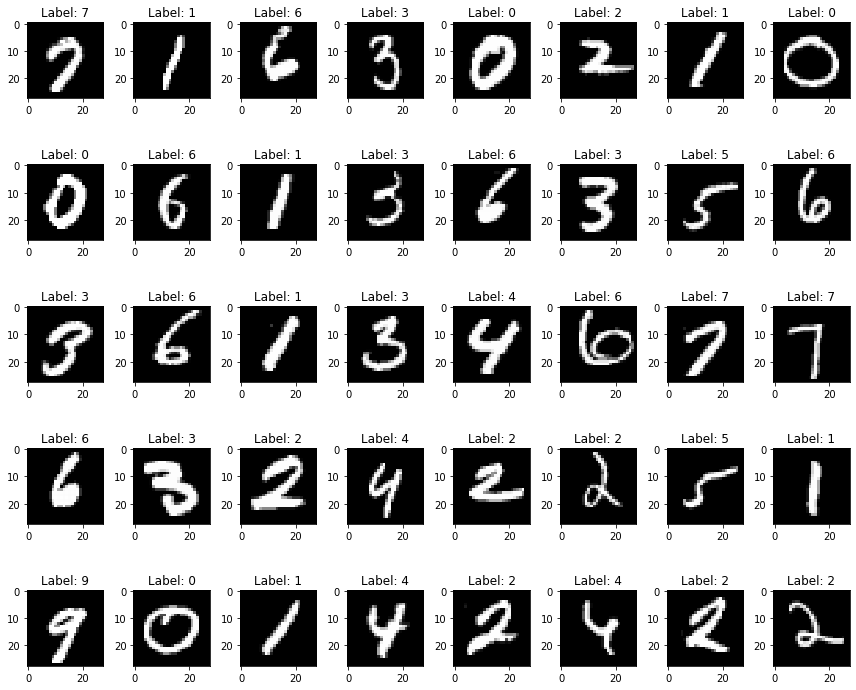

In [5]:
from random import seed
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

# seed random number generator
seed(1)

# define number of images to show
num_row = 5
num_col = 8
num= num_row*num_col
start = randint(0,len(X_train)-num)

# get images
images = X_train[start:start+num]
labels = Y_train[start:start+num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In the images shown above, you can see that each digit is unique, size normalized, upright, and centered in the image plane.

## PART 2. Augmenting the MNIST dataset
In Part 1, it was specified that the MNIST dataset contains centered, upright, and size normalized digits. Realistically, hand-written digits will seldom meet these criteria in real-world applications. Instead, some digits will be larger, smaller, rotated, or skewed more than others. To create a robust digit recognition model, it is in the data scientist's best interest to augment the dataset capture these types of behavior. To augment the MNIST dataset in our example, we will use the ImageDataGenerator class available in the keras python library. You can find more information about this class here: https://keras.io/preprocessing/image/.  First, we need to instantiate the class as shown below:

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=0,
                             zoom_range=0,
                             width_shift_range=0,
                             height_shift_range=0,
                             shear_range=0)

The arguments being passed to the ImageDataGenerator class dictate how the images will be transformed (for additional transform options, refer to the keras documentation). In this specific example, since each value is set to 0, no transformation will occur. Once you have created the image data generator object, you must fit the data generator to a set of training images in order to learn useful statistics that can be used to transform the images. Fitting is done as follows:

In [7]:
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

Finally, you can use datagen to produce transformed images as shown below.

BEFORE:



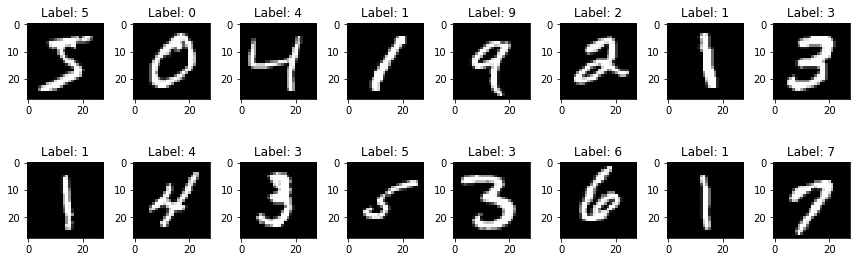

AFTER:



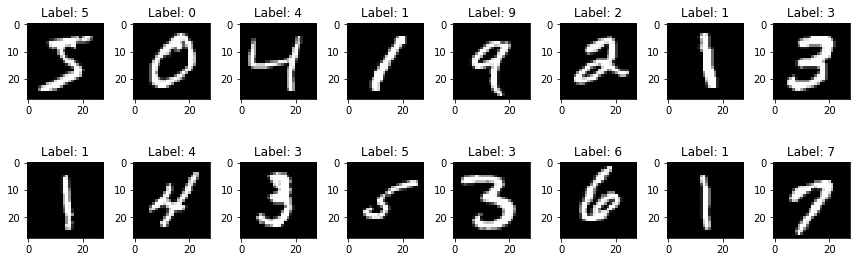

In [8]:
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()


Once again, since we set all the arguments to 0, we did not apply a transformation to the images. In the following few sections, several transform arguments are reviewed for your awareness.

### Rotations
The first type of transformation we will explore is the rotation_range argument. This parameter is used to randomly rotate images about the image centroid up the rotation_range angle. The examples below show before and after rotation images:

BEFORE:



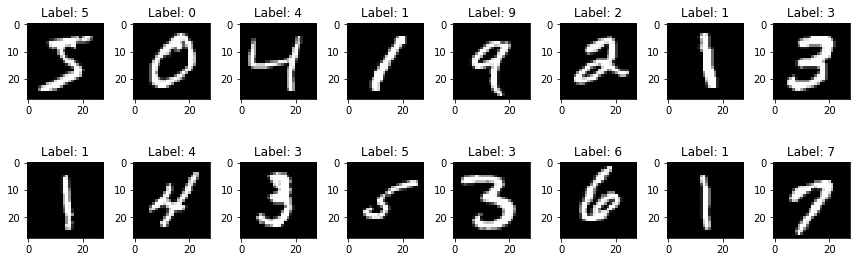

AFTER:



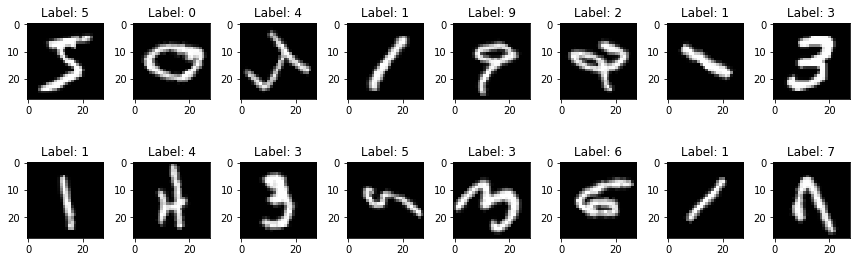

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(rotation_range=60)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

### Shift
The next type of transformation we will explore is the width_shift and height_shift arguements. These parameters are used to translate the image vertically or horizontally. The examples below show before and after shift images:

BEFORE:



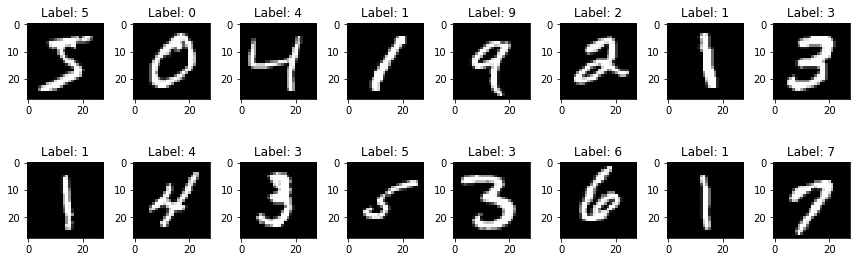

AFTER:



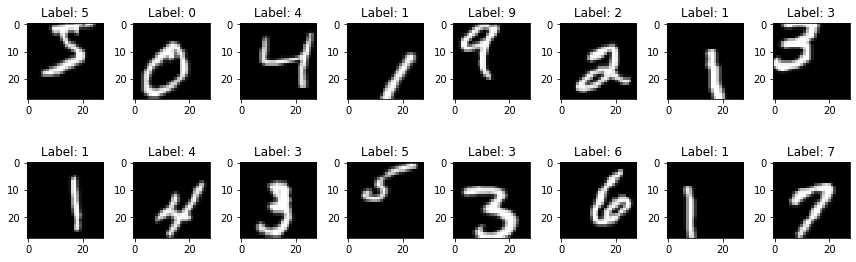

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(width_shift_range=0.25, 
                             height_shift_range=0.25)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

### Shear
The shear transformation is used to displace pixels in a fixed direction (randomly selected up to shear_range value), by an amount proportional to its signed distance from the line that is parallel to that direction and goes through the origin. The examples below show before and after shear images:

BEFORE:



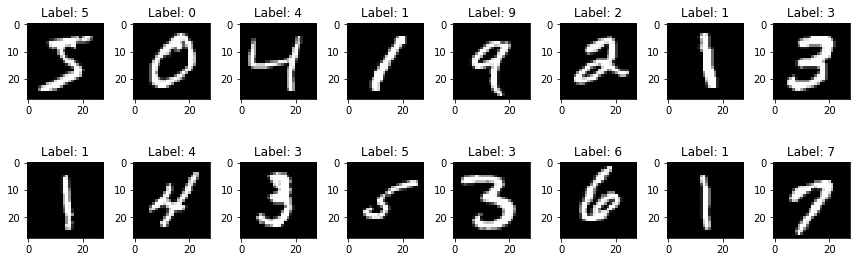

AFTER:



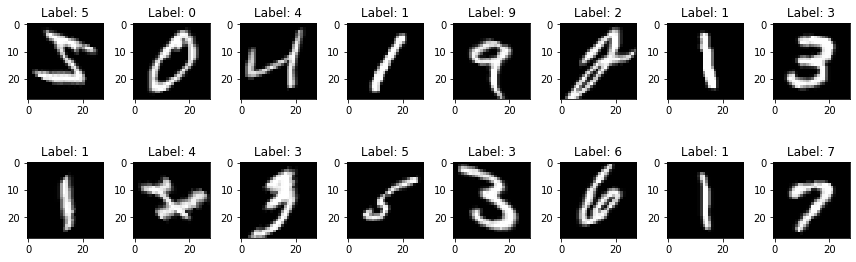

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(shear_range=45)

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

### Zoom
The final transformation technique considered in this work is the zoom transform. The zoom transform is used to randomly scale the image up or down in the vertical and/or horizontal direction. The example below show before and after zoom images.

BEFORE:



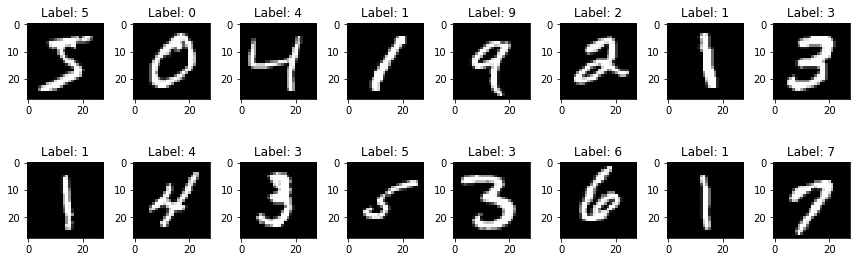

AFTER:



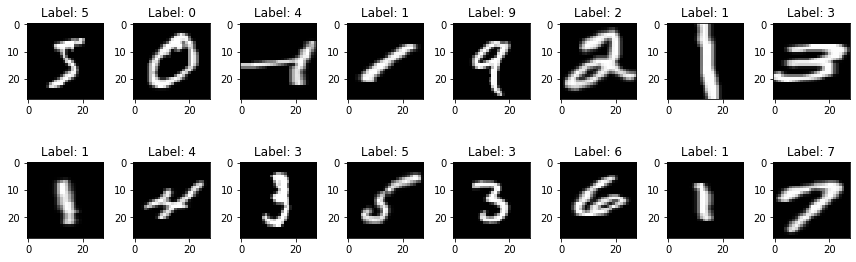

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(zoom_range=[0.5,1.5])

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

### Augmented MNIST dataset (with combined transforms)
Combining all of the previously mentioned transformations, we obtain unique digit representations that can now be used to improve digit recognition model performance. 

BEFORE:



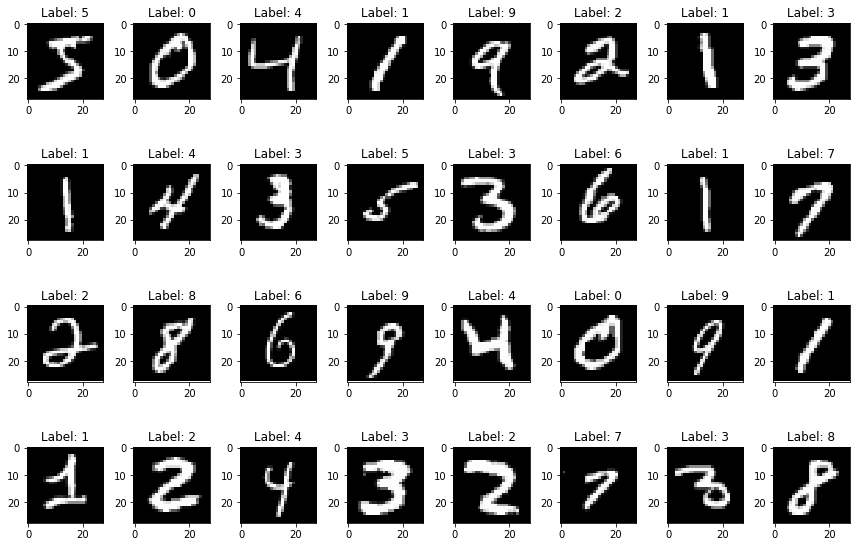

AFTER:



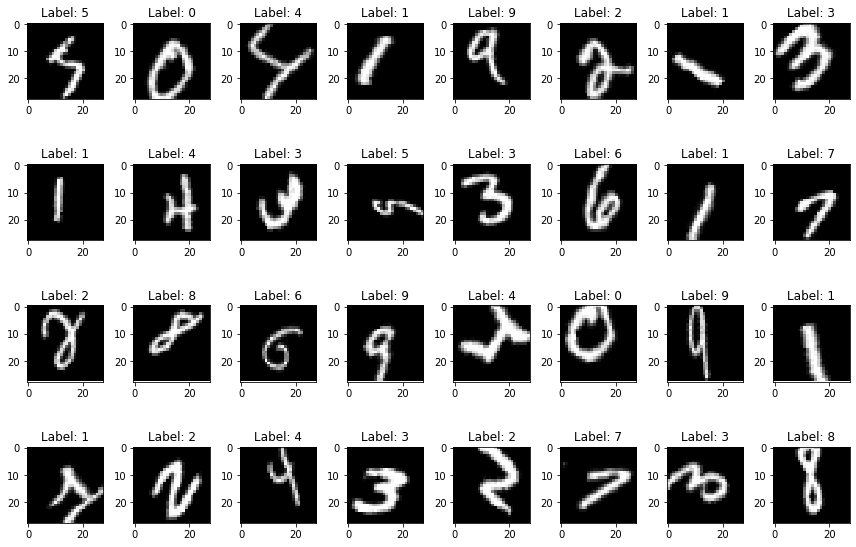

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.15, 
                             height_shift_range=0.15,
                             shear_range=20,
                             zoom_range=[0.75,1.25])

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

## Putting it all together
The following code contains most of the content described in this notebook. It is compiled underneath for your convenience.

PART 1.


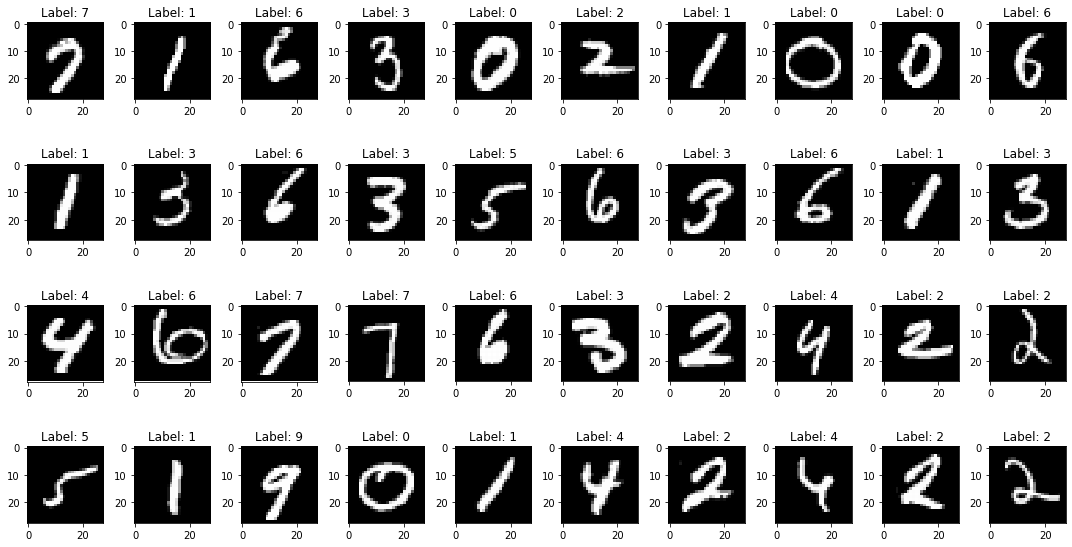

PART 2.
BEFORE:



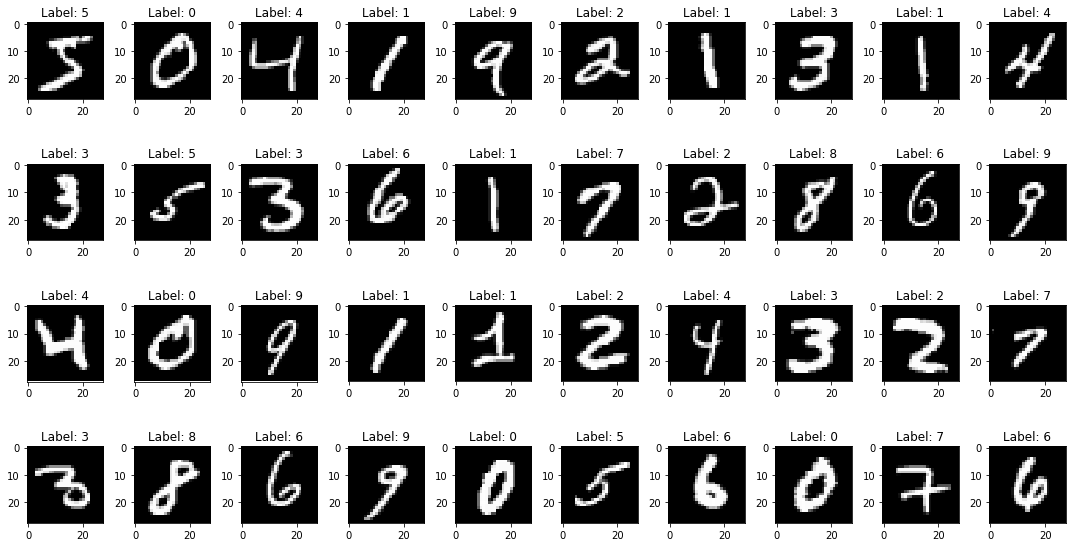

AFTER:



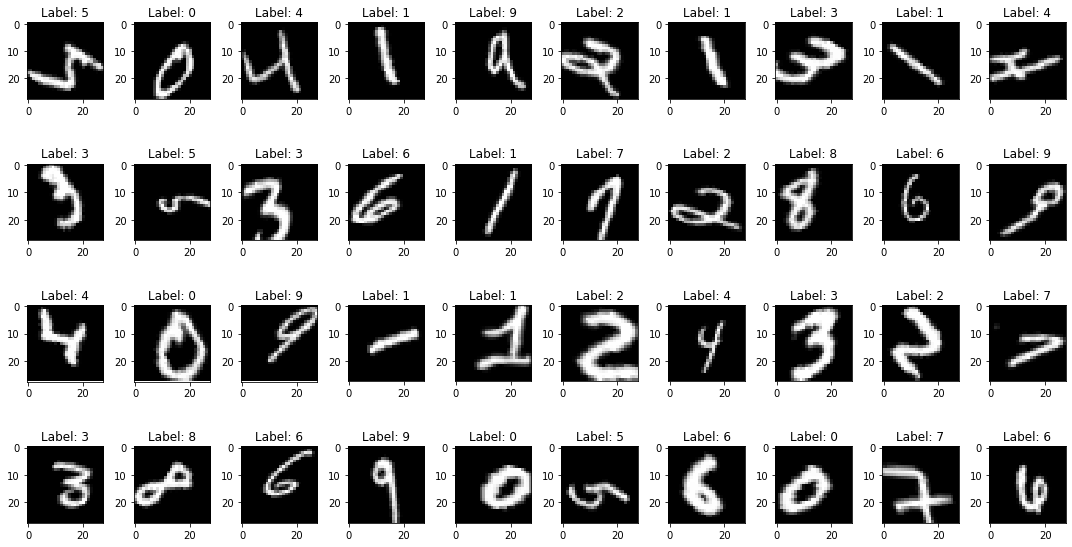

In [14]:
from random import seed
from random import randint
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# PART 1
print('PART 1.')
# get data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# seed random number generator
seed(1)

# define number of images to show
num_row = 4
num_col = 10
num= num_row*num_col
start = randint(0,len(X_train)-num)

# get images
images = X_train[start:start+num]
labels = Y_train[start:start+num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()



# PART 2
print('PART 2.')
# create the class object
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.15, 
                             height_shift_range=0.15,
                             shear_range=20,
                             zoom_range=[0.75,1.25])

# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

# plot before
print('BEFORE:\n')
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), 
                         Y_train.reshape(Y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

## Knowledge Check
After reading this document, you should be able to:
<ul>
    <li>Import the MNIST dataset from an online repository or local directory</li>
    <li>Display MNIST content using Matplotlib</li>
    <li>Identify and apply relevant data augmentation techniques for the MNIST dataset</li>
</ul>


## References
<p>[1] LeCun, Y. (n.d.). THE MNIST DATABASE. Retrieved January 5, 2020, from http://yann.lecun.com/exdb/mnist/.</p>
<p>[2] tf.keras.datasets.mnist.load_data  :   TensorFlow Core r2.1. (n.d.). Retrieved January 9, 2020, from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data.</p>
<p>[3] Image Preprocessing. (n.d.). Retrieved January 12, 2020, from https://keras.io/preprocessing/image/. </p>

## Connect With Mr Data Science:
<a href="https://www.mrdatascience.com">mrdatascience.com</a>,
<a href="https://gist.github.com/MrDataScience">GitHub</a>,
<a href="https://medium.com/@mrdatascience">Medium</a>,
<a href="https://www.youtube.com/channel/UCHQeKhLl99Ho6EF0MNZozWQ?view_as=subscriber">YouTube</a>
